In [8]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [10]:
print(f" x_train : {x_train.shape}")


 x_train : (50000, 32, 32, 3)


In [11]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

In [14]:
def plt_sample(x,y,index):
 plt.figure(figsize =(15,2))
 plt.imshow(x[index])
 plt.xlabel(classes[y[index]])

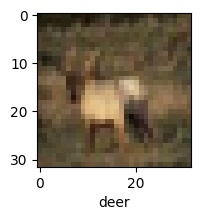

In [15]:
plt_sample(x_train,y_train,3)

In [16]:
x_train=x_train/255
x_test = x_test/255

In [17]:
#ann
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid') #category
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy', #direct value
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3065 - loss: 1.9285
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4206 - loss: 1.6518
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4599 - loss: 1.5418
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4758 - loss: 1.4932
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4913 - loss: 1.4427


In [18]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4673 - loss: 1.5017


[1.5070279836654663, 0.4668000042438507]

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53      1000
           1       0.61      0.60      0.61      1000
           2       0.32      0.47      0.38      1000
           3       0.40      0.22      0.28      1000
           4       0.38      0.46      0.41      1000
           5       0.42      0.34      0.37      1000
           6       0.68      0.24      0.35      1000
           7       0.39      0.72      0.50      1000
           8       0.55      0.68      0.61      1000
           9       0.60      0.48      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [20]:
cnn = models.Sequential([
    #cnn1
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    #cnn2
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  # Corrected kernel_size
    layers.MaxPooling2D((2, 2)),

    #dense
    layers.Flatten(),  # Removed input_shape as it's already defined in the first layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Changed activation to softmax for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3574 - loss: 1.7570
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5783 - loss: 1.1959
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6297 - loss: 1.0512
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6594 - loss: 0.9633
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8989
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7010 - loss: 0.8504
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7148 - loss: 0.8156
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7274 - loss: 0.7752
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7412 - loss: 0.7466
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7492 - loss: 0.7094


In [25]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6925 - loss: 0.9066


[0.9202436804771423, 0.6884999871253967]

In [26]:
y_test=y_test.reshape(-1,)

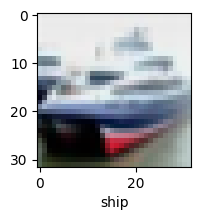

In [28]:
plt_sample(x_test,y_test,1)

In [29]:
y_pred=cnn.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [30]:
y_pred[:5]

array([[1.4844262e-05, 3.2540545e-04, 1.1877707e-03, 8.9448458e-01,
        5.3324162e-05, 7.7813335e-02, 1.6411530e-02, 4.3652351e-05,
        9.3406038e-03, 3.2487322e-04],
       [8.2344878e-03, 4.4826783e-02, 1.0636618e-05, 5.5068042e-05,
        3.5504165e-06, 5.0957453e-07, 4.9326509e-06, 6.7945598e-06,
        9.0794289e-01, 3.8914330e-02],
       [3.8237694e-01, 1.5409119e-01, 1.0089652e-02, 2.0033937e-02,
        5.0139362e-03, 8.1669050e-04, 8.0039641e-03, 9.2889257e-03,
        2.6543570e-01, 1.4484911e-01],
       [8.0084246e-01, 4.5501343e-03, 5.6184281e-02, 7.3773614e-03,
        2.2102050e-02, 1.8700857e-05, 6.2967860e-03, 1.4463345e-04,
        1.0209602e-01, 3.8763732e-04],
       [1.1204222e-06, 1.5968193e-04, 7.9108484e-02, 5.7275083e-02,
        2.6443559e-01, 4.0804902e-03, 5.9464967e-01, 2.2359764e-06,
        2.8663286e-04, 9.7265934e-07]], dtype=float32)

In [31]:
np.argmax(y_pred[0])

3

In [33]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [35]:
classes[y_classes[1]]

'ship'

In [36]:
classes[y_classes[0]]

'cat'

In [37]:
classes[y_classes[3]]

'airplane'

In [38]:
classes[y_classes[2]]

'airplane'

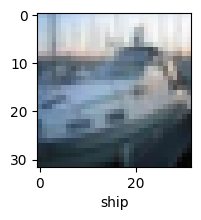

In [39]:
plt_sample(x_test,y_test,2)

In [41]:

print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.83      0.74      0.78      1000
           2       0.65      0.54      0.59      1000
           3       0.48      0.53      0.50      1000
           4       0.67      0.63      0.65      1000
           5       0.59      0.60      0.60      1000
           6       0.71      0.83      0.76      1000
           7       0.77      0.68      0.72      1000
           8       0.76      0.81      0.78      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

